In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('celesta_train.csv')
df.head()

,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,2.0,5832
1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,2.0,5584
2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408
3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644
4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739


In [3]:
df.shape

(8400, 8)

In [4]:
df.corr()

C:\Users\Shirshak\AppData\Local\Temp\ipykernel_25536\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,rooms,retail_price,sqft,toilets,image_id
index,1.000000,0.100940,-0.008960,0.167421,0.117337,1.000000
rooms,0.100940,1.000000,0.353616,0.671695,0.671795,0.100940
retail_price,-0.008960,0.353616,1.000000,0.592803,0.522562,-0.008960
sqft,0.167421,0.671695,0.592803,1.000000,0.801854,0.167421
toilets,0.117337,0.671795,0.522562,0.801854,1.000000,0.117337
image_id,1.000000,0.100940,-0.008960,0.167421,0.117337,1.000000


In [5]:
df.describe()

,index,rooms,retail_price,sqft,toilets,image_id
count,8400.000000,8204.000000,8.400000e+03,8253.000000,8400.000000,8400.000000
mean,6011.068690,3.484154,6.746794e+05,2162.801648,2.451714,6011.068690
std,3473.684303,1.028957,3.901718e+05,1050.270982,0.941510,3473.684303
min,0.000000,1.000000,1.950000e+05,280.000000,0.000000,0.000000
25%,2998.750000,3.000000,3.990000e+05,1386.000000,2.000000,2998.750000
50%,6066.500000,3.000000,5.854500e+05,1919.000000,2.100000,6066.500000
75%,9031.250000,4.000000,7.990000e+05,2761.000000,3.000000,9031.250000
max,11999.000000,10.000000,2.000000e+06,11183.000000,8.100000,11999.000000


In [6]:
data=df.copy()

# DATA ANALYSIS

In [7]:
numerical=[column for column in data.columns if data[column].dtype!='O']
numerical

['index', 'rooms', 'retail_price', 'sqft', 'toilets', 'image_id']

In [8]:
discrete=[column for column in numerical if len(data[column].unique())<=30]
discrete

['rooms', 'toilets']

In [9]:
continuous=[column for column in numerical if len(data[column].unique())>30]
continuous

['index', 'retail_price', 'sqft', 'image_id']

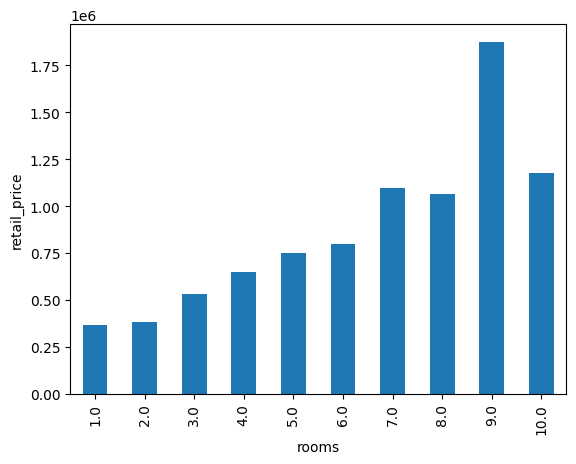

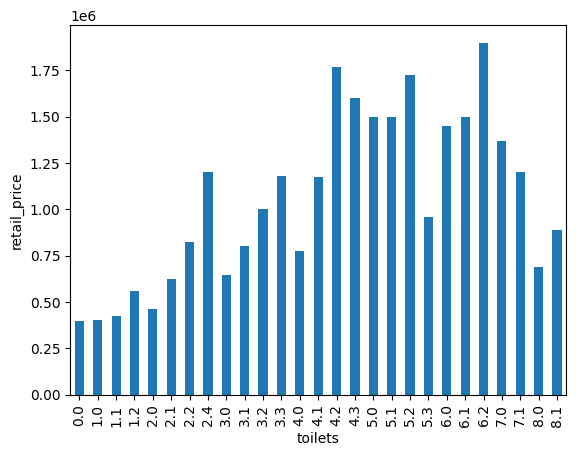

In [10]:
for feature in discrete:
    data.groupby(feature)['retail_price'].median().plot.bar()
    plt.ylabel('retail_price')
    plt.show()

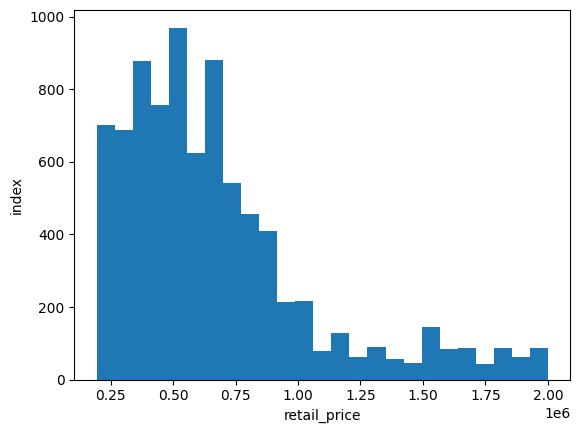

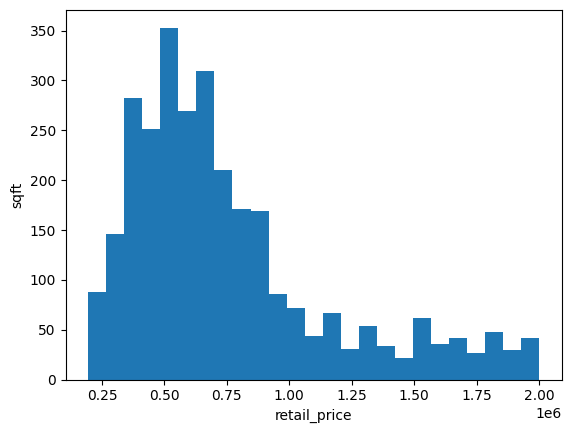

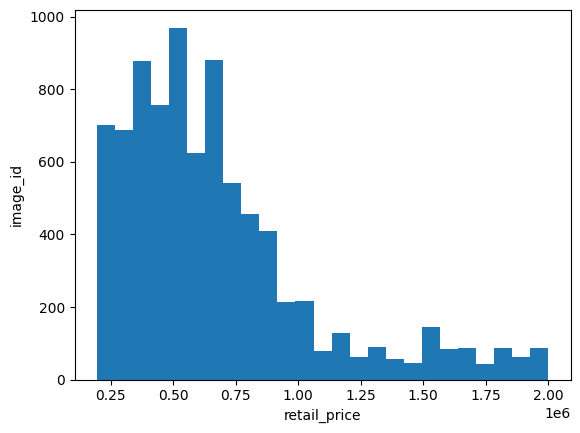

In [12]:
for feature in continuous:
    if feature!='retail_price':
        data.groupby(feature)['retail_price'].median().plot.hist(bins=25)
        plt.xlabel('retail_price')
        plt.ylabel(feature)
        plt.show()

In [13]:
for feature in continuous:
    print(feature,':',np.sqrt(np.sqrt(data[feature])).skew())

index : -1.073566665980106
retail_price : 0.5085538247210208
sqft : 0.27768538997934017
image_id : -1.073566665980106


In [14]:
for feature in discrete:
    print(feature,':',data[feature].skew())

rooms : 0.4589525120794743
toilets : 0.8912931241657192


In [15]:
#Hence all the curves are positively skewed 

C:\Users\Shirshak\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Shirshak\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


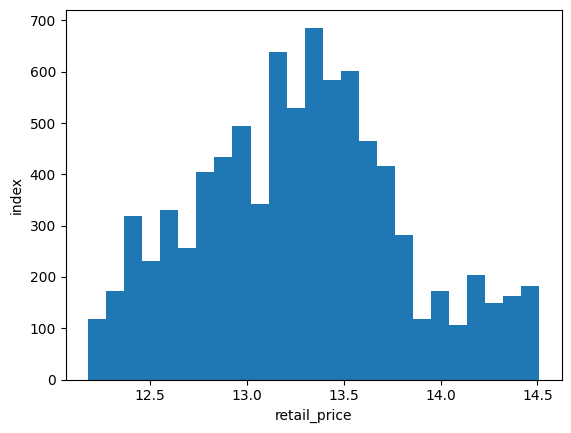

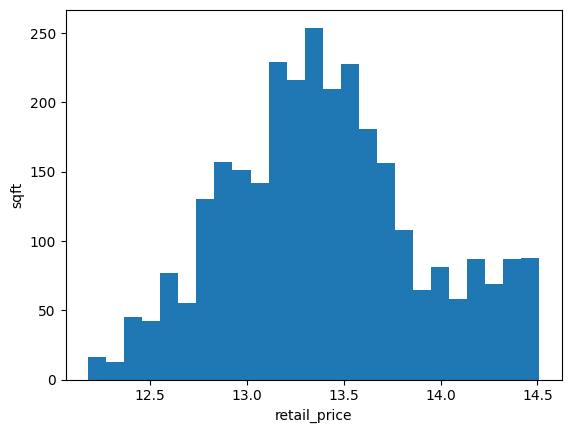

C:\Users\Shirshak\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Shirshak\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


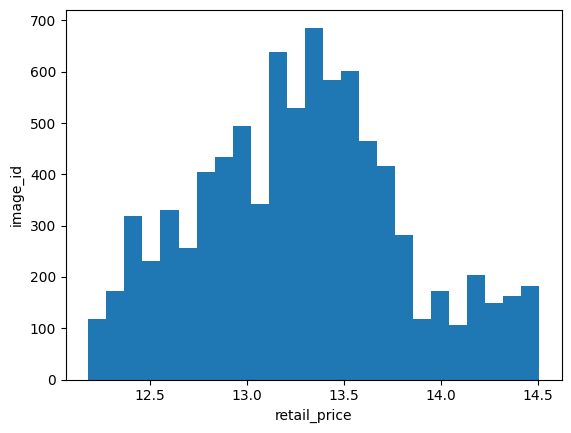

In [18]:
for feature in continuous:
    if feature!='retail_price':
        data[feature]=np.log(data[feature])
        data.groupby(feature)['retail_price'].median().plot.hist(bins=25)
        plt.xlabel('retail_price')
        plt.ylabel(feature)
        plt.show()

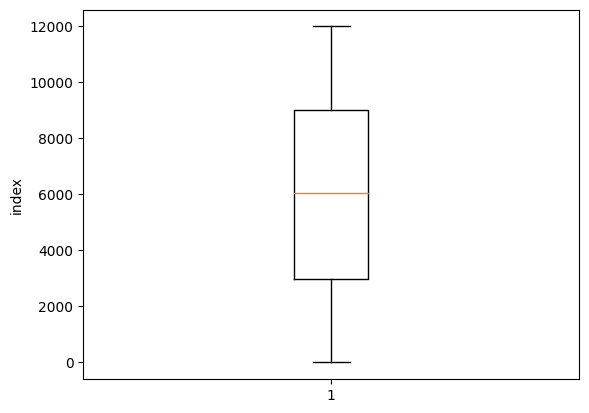

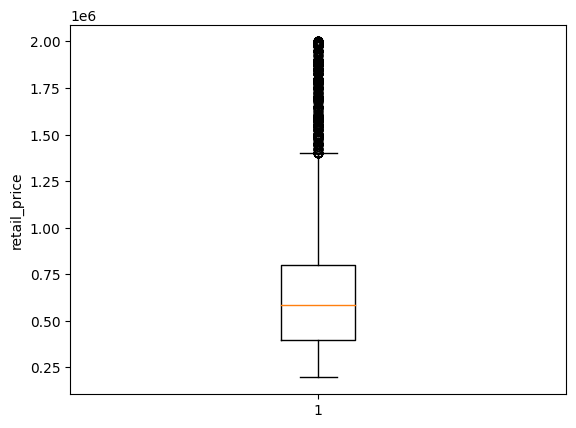

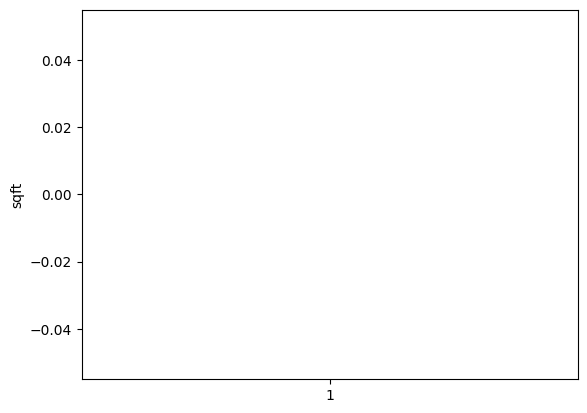

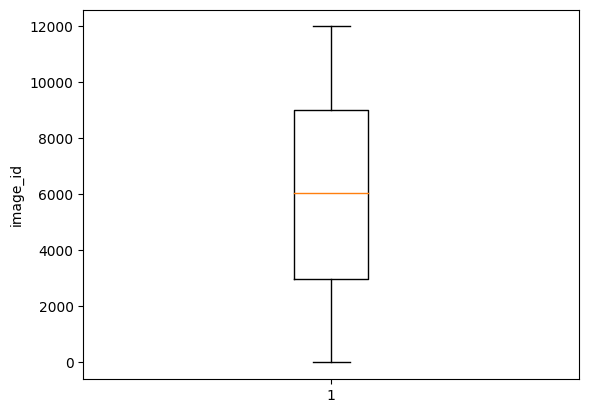

In [19]:
data=df.copy()
for feature in continuous:
    plt.boxplot(data[feature])
    plt.ylabel(feature)
    plt.show()

In [20]:
categorical=[column for column in data.columns if data[column].dtype=='O']
categorical

['address', 'city']

In [21]:
for feature in categorical:
    print(feature,len(data[feature].unique()))

address 7243
city 351


In [22]:
#Hence we have high cardanality

 # FEATURE ENGINEERING 

In [23]:
data=df.copy()
nan_feature=[column for column in data.columns if data[column].isnull().sum()>1]
nan_feature
for feature in nan_feature:
    print(data[feature].isnull().sum())

196
147


In [24]:
for feature in nan_feature:
    median=data[feature].median()
    data[feature].fillna(median,inplace=True)

In [25]:
r=data['rooms'].isnull().sum()
s=data['sqft'].isnull().sum()
print(r,s)

0 0


In [26]:
data

,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,2.0,5832
1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,2.0,5584
2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408
3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644
4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739
...,...,...,...,...,...,...,...,...
8395,792,4.0,289990,45228 Lorimer Avenue,"Lancaster, CA",1498.0,2.0,792
8396,10671,4.0,895000,265 Old Toll Road,"Lake Arrowhead, CA",2981.0,3.0,10671
8397,11650,3.0,479900,5925 Balmoral Dr,"San Diego, CA",1272.0,1.0,11650
8398,2134,4.0,599000,28137 Stonington Lane,"Saugus, CA",1924.0,3.0,2134


In [27]:
#dealing with categorical values

In [6]:
count=data['city'].value_counts()

NameError: name 'data' is not defined

In [29]:
for city,val in zip(count.index,count):
    if val<20:
        data.replace(city,'other',inplace=True)

In [30]:
data

,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,5832,2.0,299000,81913 Calle Torbellino,"Indio, CA",1295.0,2.0,5832
1,5584,3.0,299000,26076 Fiesta Place,"Hemet, CA",1566.0,2.0,5584
2,9408,5.0,499990,34450 Fawn Ridge Place,"Yucaipa, CA",3068.0,3.0,9408
3,4644,4.0,849900,26481 Montebello Place,"Mission Viejo, CA",2230.0,2.1,4644
4,5739,3.0,333490,2562 Red Spruce Lane,"San Jacinto, CA",1898.0,2.0,5739
...,...,...,...,...,...,...,...,...
8395,792,4.0,289990,45228 Lorimer Avenue,"Lancaster, CA",1498.0,2.0,792
8396,10671,4.0,895000,265 Old Toll Road,"Lake Arrowhead, CA",2981.0,3.0,10671
8397,11650,3.0,479900,5925 Balmoral Dr,"San Diego, CA",1272.0,1.0,11650
8398,2134,4.0,599000,28137 Stonington Lane,other,1924.0,3.0,2134


In [31]:
data['city'].unique()

array(['Indio, CA', 'Hemet, CA', 'Yucaipa, CA', 'Mission Viejo, CA',
       'San Jacinto, CA', 'San Diego, CA', 'Chula Vista, CA',
       'Indian Wells, CA', 'Colton, CA', 'Lake Arrowhead, CA',
       'San Bernardino, CA', 'other', 'Carlsbad, CA', 'San Clemente, CA',
       'Oceanside, CA', 'Ladera Ranch, CA', 'Perris, CA', 'Whittier, CA',
       'Norwalk, CA', 'Sylmar, CA', 'Los Angeles, CA', 'Lancaster, CA',
       'Chino Hills, CA', 'Westminster, CA', 'Palmdale, CA',
       'Anaheim, CA', 'Garden Grove, CA', 'West Covina, CA',
       'Desert Hot Springs, CA', 'Upland, CA', 'Corona, CA',
       'Compton, CA', 'Bakersfield, CA', 'Adelanto, CA', 'Irvine, CA',
       'Anaheim Hills, CA', 'Valencia, CA', 'Hesperia, CA',
       'Huntington Beach, CA', 'Chino, CA', 'Laguna Niguel, CA',
       'Joshua Tree, CA', 'Victorville, CA', 'Fontana, CA', 'Orange, CA',
       'Riverside, CA', 'Rancho Cucamonga, CA', 'Seal Beach, CA',
       'Santa Ana, CA', 'Borrego Springs, CA', 'Running Springs, CA

In [32]:
labels_ordered=data.groupby(['city'])['retail_price'].mean().sort_values().index
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
data['city']=data['city'].map(labels_ordered)

In [33]:
data

,index,rooms,retail_price,address,city,sqft,toilets,image_id
0,5832,2.0,299000,81913 Calle Torbellino,38,1295.0,2.0,5832
1,5584,3.0,299000,26076 Fiesta Place,14,1566.0,2.0,5584
2,9408,5.0,499990,34450 Fawn Ridge Place,53,3068.0,3.0,9408
3,4644,4.0,849900,26481 Montebello Place,73,2230.0,2.1,4644
4,5739,3.0,333490,2562 Red Spruce Lane,10,1898.0,2.0,5739
...,...,...,...,...,...,...,...,...
8395,792,4.0,289990,45228 Lorimer Avenue,3,1498.0,2.0,792
8396,10671,4.0,895000,265 Old Toll Road,84,2981.0,3.0,10671
8397,11650,3.0,479900,5925 Balmoral Dr,89,1272.0,1.0,11650
8398,2134,4.0,599000,28137 Stonington Lane,74,1924.0,3.0,2134


In [34]:
data.drop(['address'],axis=1,inplace=True)

In [35]:
data

,index,rooms,retail_price,city,sqft,toilets,image_id
0,5832,2.0,299000,38,1295.0,2.0,5832
1,5584,3.0,299000,14,1566.0,2.0,5584
2,9408,5.0,499990,53,3068.0,3.0,9408
3,4644,4.0,849900,73,2230.0,2.1,4644
4,5739,3.0,333490,10,1898.0,2.0,5739
...,...,...,...,...,...,...,...
8395,792,4.0,289990,3,1498.0,2.0,792
8396,10671,4.0,895000,84,2981.0,3.0,10671
8397,11650,3.0,479900,89,1272.0,1.0,11650
8398,2134,4.0,599000,74,1924.0,3.0,2134


# Feature Scaling

In [36]:
feature_scale=[feature for feature in data.columns if feature not in ['retail_price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(copy=True,feature_range=(0,1))
scaler.fit(data[feature_scale])

MinMaxScaler()

In [37]:
scaler.transform(data[feature_scale])

array([[0.4860405 , 0.11111111, 0.36538462, 0.09309364, 0.24691358,
        0.4860405 ],
       [0.46537211, 0.22222222, 0.13461538, 0.11794919, 0.24691358,
        0.46537211],
       [0.78406534, 0.44444444, 0.50961538, 0.25570944, 0.37037037,
        0.78406534],
       ...,
       [0.97091424, 0.22222222, 0.85576923, 0.09098413, 0.12345679,
        0.97091424],
       [0.17784815, 0.33333333, 0.71153846, 0.15078419, 0.37037037,
        0.17784815],
       [0.56771398, 0.44444444, 0.30769231, 0.23727414, 0.37037037,
        0.56771398]])

In [38]:
data = pd.concat([data[['retail_price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [39]:
data.drop(['index'],axis=1,inplace=True)

# Feature Selection

In [40]:
X_train=data.copy()

In [41]:
X_train=X_train.drop(["retail_price"],axis=1)

In [42]:
for feature in X_train.columns:
    if X_train[feature].isnull().sum()>=1:
        print(feature)
        break

In [43]:
Y_train=data[["retail_price"]]

In [44]:
X_train

,rooms,city,sqft,toilets,image_id
0,0.111111,0.365385,0.093094,0.246914,0.486041
1,0.222222,0.134615,0.117949,0.246914,0.465372
2,0.444444,0.509615,0.255709,0.370370,0.784065
3,0.333333,0.701923,0.178850,0.259259,0.387032
4,0.222222,0.096154,0.148400,0.246914,0.478290
...,...,...,...,...,...
8395,0.333333,0.028846,0.111712,0.246914,0.066006
8396,0.333333,0.807692,0.247730,0.370370,0.889324
8397,0.222222,0.855769,0.090984,0.123457,0.970914
8398,0.333333,0.711538,0.150784,0.370370,0.177848


In [45]:
data

,retail_price,rooms,city,sqft,toilets,image_id
0,299000,0.111111,0.365385,0.093094,0.246914,0.486041
1,299000,0.222222,0.134615,0.117949,0.246914,0.465372
2,499990,0.444444,0.509615,0.255709,0.370370,0.784065
3,849900,0.333333,0.701923,0.178850,0.259259,0.387032
4,333490,0.222222,0.096154,0.148400,0.246914,0.478290
...,...,...,...,...,...,...
8395,289990,0.333333,0.028846,0.111712,0.246914,0.066006
8396,895000,0.333333,0.807692,0.247730,0.370370,0.889324
8397,479900,0.222222,0.855769,0.090984,0.123457,0.970914
8398,599000,0.333333,0.711538,0.150784,0.370370,0.177848


In [46]:
Y_train.isnull().value_counts()

retail_price
False           8400
dtype: int64

In [47]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option("display.max_columns",None)

In [48]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X_train,Y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [49]:
selected_feature = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 5
selected features: 5
features with coefficients shrank to zero: 0


In [50]:
selected_feature

Index(['rooms', 'city', 'sqft', 'toilets', 'image_id'], dtype='object')

In [51]:
X_train=X_train[selected_feature]

In [52]:
X_train

,rooms,city,sqft,toilets,image_id
0,0.111111,0.365385,0.093094,0.246914,0.486041
1,0.222222,0.134615,0.117949,0.246914,0.465372
2,0.444444,0.509615,0.255709,0.370370,0.784065
3,0.333333,0.701923,0.178850,0.259259,0.387032
4,0.222222,0.096154,0.148400,0.246914,0.478290
...,...,...,...,...,...
8395,0.333333,0.028846,0.111712,0.246914,0.066006
8396,0.333333,0.807692,0.247730,0.370370,0.889324
8397,0.222222,0.855769,0.090984,0.123457,0.970914
8398,0.333333,0.711538,0.150784,0.370370,0.177848


# TRAINING MODEL

### SVM

In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
train,test=train_test_split(data,test_size=0.2,random_state=42)

In [55]:
train

,retail_price,rooms,city,sqft,toilets,image_id
8121,259900,0.111111,0.355769,0.047693,0.123457,0.717060
2484,725000,0.333333,0.875000,0.153719,0.259259,0.346446
893,1077500,0.555556,0.711538,0.262772,0.493827,0.029919
4436,350000,0.111111,0.711538,0.068513,0.123457,0.108592
7299,875000,0.333333,0.788462,0.262588,0.382716,0.647054
...,...,...,...,...,...,...
5734,550000,0.333333,0.634615,0.119692,0.246914,0.152013
5191,365000,0.222222,0.163462,0.093369,0.246914,0.749979
5390,755000,0.333333,0.711538,0.133633,0.370370,0.200517
860,385000,0.222222,0.528846,0.080345,0.123457,0.504709


In [56]:
X_train=train.copy()
Y_train=train[['retail_price']]
X_train.drop(['retail_price'],axis=1,inplace=True)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [57]:
X_test=test.copy()
Y_test=test[['retail_price']]
X_test.drop(['retail_price'],axis=1,inplace=True)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_test, Y_test

(array([[0.22222222, 0.08653846, 0.07814363, 0.24691358, 0.07833986],
        [0.33333333, 0.26923077, 0.22452536, 0.37037037, 0.53379448],
        [0.22222222, 0.05769231, 0.1010731 , 0.24691358, 0.46253854],
        ...,
        [0.44444444, 0.17307692, 0.16289095, 0.25925926, 0.73839487],
        [0.11111111, 0.71153846, 0.04631753, 0.12345679, 0.21743479],
        [0.22222222, 0.71153846, 0.07062276, 0.24691358, 0.20643387]]),
 array([[310000],
        [475000],
        [250000],
        ...,
        [315000],
        [750000],
        [749000]], dtype=int64))

In [58]:
Y_train=Y_train.reshape(Y_train.shape[0],)

In [59]:
#Y_train_rt4=np.sqrt(np.sqrt(Y_train))
#Y_test_rt4=np.log(Y_test)

In [60]:
model=SVR(C=1,kernel='linear')
model.fit(X_train,Y_train)

SVR(C=1, kernel='linear')

In [61]:
y_pred=model.predict(X_test)
mse=metrics.mean_squared_error(Y_test,y_pred)
rmse=math.sqrt(mse)
print(rmse)

387951.8547226509


### Random forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf=RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', 
                                  bootstrap = True, random_state = 42, max_samples = 0.7,
                                  warm_start = False)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.7, n_estimators=500,
                      random_state=42)

In [65]:
y_pred=rf.predict(X_test)
mse=metrics.mean_squared_error(Y_test,y_pred)
rmse=math.sqrt(mse)
print(rmse)

114833.44244198236


In [112]:
y_pred=rf.predict(X_train)
mse=metrics.mean_squared_error(Y_train,y_pred)
rmse=math.sqrt(mse)
print(rmse)

66440.81957892353


In [113]:
#Hence random forest shows good amount of overfitting

In [66]:
n_estimators=[int(x) for x in np.linspace(start=200, stop=1500 , num=10)]
criterion=['squared_error','absolute_error','friedman_mse','poisson']
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,100,10)]
min_samples_split=[1,3,4,5,7,9]
min_samples_leave=[1,2,4,6,8]

In [68]:
params={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leave,
    'criterion':criterion
}

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [70]:
random=RandomizedSearchCV(estimator=rf,param_distributions=params,n_iter=30,cv=3,verbose=2,random_state=100,n_jobs=4)
random.fit(X_train,Y_train)

In [69]:
random.best_params_

{'n_estimators': 200,
 'min_samples_split': 1,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'criterion': 'friedman_mse'}

In [186]:
rf=RandomForestRegressor(n_estimators= 200,
 min_samples_split= 1.0,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 40,
 criterion= 'friedman_mse')
rf.fit(X_train,Y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=40,
                      min_samples_leaf=2, min_samples_split=1.0,
                      n_estimators=200)

### GRADIENT BOOST

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict

In [73]:
estimator=GradientBoostingRegressor(subsample= 0.6,
 n_estimators= 588,
 min_samples_leaf= 4,
 max_leaf_nodes= 10,
 max_features= 1.0,
 max_depth= 10,
 learning_rate= 0.1)
estimator.fit(X_train,Y_train)

GradientBoostingRegressor(max_depth=10, max_features=1.0, max_leaf_nodes=10,
                          min_samples_leaf=4, n_estimators=588, subsample=0.6)

In [74]:
pred=estimator.predict(X_test)
mse=metrics.mean_squared_error(Y_test,pred)
rmse=math.sqrt(mse)
print(rmse)

75236.1062554497


In [75]:
pred=estimator.predict(X_train)
mse=metrics.mean_squared_error(Y_train, pred)
rmse=math.sqrt(mse)
print(rmse)

45310.68043883646


In [76]:
params_gradient={
    'n_estimators':[int(x) for x in np.linspace(start=100, stop=1200 , num=10)],
    'learning_rate':[0.05,0.1,0.2,0.3],
    'max_depth':[int(x) for x in np.linspace(2,10,2)],
    'min_samples_leaf':[1,2,3,4],
    'max_features':['auto','sqrt','log2'],
    'max_leaf_nodes':[int(x) for x in np.linspace(2,10,2)],
    'subsample':[0.5,0.6,0.7,1],
}

random_gb=RandomizedSearchCV(estimator,param_distributions=params_gradient,n_iter=30,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
random_gb.fit(X_train,Y_train)

In [78]:
random_gb.best_params_

### XGBOOST

In [79]:
import xgboost as xg

In [80]:
XGB=xg.XGBRegressor(subsample= 1,
 reg_lambda= 5,
 n_estimators= 833,
 min_child_weight= 1,
 max_depth= 2,
 gamma= 0.0,
 eta= 0.3,
 colsample_bytree= 0.7,
 booster= 'gbtree')
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=833, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [81]:
XGB_TEST=xg.XGBRegressor(colsample_bytree= 0.8,
 eta= 0.25,
 max_depth= 2,
 min_child_weight= 6,
 n_estimators= 800,
 reg_lambda= 5,
 subsample= 1)
XGB_TEST.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.25,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=6, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [82]:
params_xgb={
    'n_estimators':[int(x) for x in np.linspace(start=100, stop=1200 , num=10)],
    'booster':['gbtree','gblinear','dart'],
    'eta':[0.05,0.1,0.2,0.3],
    'gamma':[0.0,0.1,0.2,0.3],
    'max_depth':[int(x) for x in np.linspace(2,20,2)],
    'min_child_weight':[1,3,5,7],
    'subsample':[0.5,0.6,0.7,1],
    'colsample_bytree':[0.3,0.5,0.7,0.8,1],
    'reg_lambda':[0.5,1,3,5,8],
}

In [208]:
random_xgb=RandomizedSearchCV(XGB,param_distributions=params_xgb,n_iter=50,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
random_xgb.fit(X_train,Y_train_rt4)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.7,
                                          early_stopping_rounds=None,
                                          enable_categorical=False, eta=0.3,
                                          eval_metric=None, feature_types=None,
                                          gamma=0.0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning...
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'colsample_bytree': [0.3, 0.5, 0.7, 0.8,
                                                             1],
                                        'eta': [0.05, 0.1, 0.2, 0.3],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'max_depth': [2, 20],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 222, 344, 466,
                                                         588, 711, 833, 955,
                                                         1077, 1200],
                                        'reg_lambda': [0.5, 1, 3, 5, 8],
                                        'subsample': [0.5, 0.6, 0.7, 1]},
                   scoring='neg_mean_squared_error', verbose=3)

In [209]:
random_xgb.best_params_

{'subsample': 0.7,
 'reg_lambda': 0.5,
 'n_estimators': 1077,
 'min_child_weight': 7,
 'max_depth': 2,
 'gamma': 0.3,
 'eta': 0.2,
 'colsample_bytree': 1,
 'booster': 'gbtree'}

In [83]:
y_pred_xg=XGB.predict(X_test)
mse=metrics.mean_squared_error(Y_test,y_pred_xg)
rmse=math.sqrt(mse)
print(rmse)

69398.95919288359


In [84]:
print(y_pred_xg,Y_test)

[284610.9  478243.47 251530.48 ... 341078.56 731725.9  707882.5 ] [[310000]
 [475000]
 [250000]
 ...
 [315000]
 [750000]
 [749000]]


In [85]:
y_pred_xg=XGB.predict(X_train)
mse=metrics.mean_squared_error(Y_train,y_pred_xg)
rmse=math.sqrt(mse)
print(rmse)

56021.7850003074


In [86]:
#GRID SEARCH CV for XG BOOST

In [87]:
param_grid={
    'subsample':[0.8,0.9,1],
    'reg_lambda':[4,5,6,7],
    'n_estimators':[int(x) for x in np.linspace(start=800, stop=1200 , num=10)],
    'max_depth':[int(x) for x in np.linspace(2,10,2)],
    'colsample_bytree':[0.6,0.7,0.8],
    'eta':[0.25,0.3,0.35],
    'min_child_weight':[6,7,8],
}

In [95]:
grid=GridSearchCV(XGB,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=2,verbose=3)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 6480 candidates, totalling 12960 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=0.7,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eta=0.3,
                                    eval_metric=None, feature_types=None,
                                    gamma=0.0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=...
                                    monotone_constraints='()', n_estimators=833,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'eta': [0.25, 0.3, 0.35], 'max_depth': [2, 10],
                         'min_child_weight': [6, 7, 8],
                         'n_estimators': [800, 844, 888, 933, 977, 1022, 1066,
                                          1111, 1155, 1200],
                         'reg_lambda': [4, 5, 6, 7],
                         'subsample': [0.8, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=3)

In [96]:
grid.best_params_

{'colsample_bytree': 0.8,
 'eta': 0.25,
 'max_depth': 2,
 'min_child_weight': 6,
 'n_estimators': 800,
 'reg_lambda': 5,
 'subsample': 1}

# TEST DATA

In [106]:
data_test=pd.read_csv('celesta_test.csv')
data_test.head()

,index,rooms,address,city,sqft,toilets,image_id
0,3076,3,33171 Sea Lion Drive,"Dana Point, CA",1510,2.0,3076
1,3218,4,33 Segovia,"San Clemente, CA",2342,3.0,3218
2,9213,2,1074 TAMARACK Road,"Pinon Hills, CA",2845,3.0,9213
3,10018,4,10989 Coalinga Avenue,"Montclair, CA",2379,3.0,10018
4,11355,4,1128 Custer,"Campo, CA",1836,3.0,11355


In [89]:
data_test.shape

(3601, 7)

In [90]:
data_test.corr()

C:\Users\Shirshak\AppData\Local\Temp\ipykernel_35716\4208469104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_test.corr()


,index,rooms,sqft,toilets,image_id
index,1.000000,0.094274,0.169649,0.096025,1.000000
rooms,0.094274,1.000000,0.669548,0.581140,0.094274
sqft,0.169649,0.669548,1.000000,0.671342,0.169649
toilets,0.096025,0.581140,0.671342,1.000000,0.096025
image_id,1.000000,0.094274,0.169649,0.096025,1.000000


# Feature Engineering of Test Data

In [91]:
nan_test=[feature for feature in data_test.columns if data_test[feature].isnull().sum()>1]
nan_test

[]

In [92]:
count=data_test['city'].value_counts()
count.values

array([117, 115,  98,  86,  85,  76,  70,  67,  65,  65,  61,  59,  55,
        54,  53,  51,  45,  41,  41,  41,  41,  40,  39,  38,  37,  37,
        35,  34,  34,  33,  32,  32,  31,  30,  29,  26,  26,  24,  24,
        23,  23,  22,  22,  21,  21,  21,  20,  20,  20,  20,  20,  19,
        18,  18,  17,  17,  17,  17,  17,  17,  16,  16,  16,  16,  16,
        16,  16,  15,  14,  14,  13,  12,  12,  12,  12,  12,  12,  12,
        12,  11,  11,  11,  11,  11,  11,  11,  11,  10,  10,  10,  10,
        10,  10,   9,   9,   9,   9,   9,   9,   9,   9,   9,   8,   8,
         8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,   7,   7,
         7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,   7,
         7,   7,   7,   7,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   4,   4,
         4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   

In [93]:
for city,val in zip(count.index,count):
    if val<50:
        data_test.replace(city,'other',inplace=True)

In [94]:
data_test

,index,rooms,address,city,sqft,toilets,image_id
0,3076,3,33171 Sea Lion Drive,other,1510,2.0,3076
1,3218,4,33 Segovia,other,2342,3.0,3218
2,9213,2,1074 TAMARACK Road,other,2845,3.0,9213
3,10018,4,10989 Coalinga Avenue,other,2379,3.0,10018
4,11355,4,1128 Custer,other,1836,3.0,11355
...,...,...,...,...,...,...,...
3596,9421,4,14603 Baylor Avenue,other,2092,2.1,9421
3597,219,3,2301 Woodland Drive,other,2000,2.1,219
3598,10333,5,5771 Jasper Street,other,3002,3.1,10333
3599,2814,3,4490 Lincoln Avenue,"Los Angeles, CA",1811,3.1,2814


In [95]:
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
data_test['city']=data_test['city'].map(labels_ordered)

In [96]:
data_test

,index,rooms,address,city,sqft,toilets,image_id
0,3076,3,33171 Sea Lion Drive,74,1510,2.0,3076
1,3218,4,33 Segovia,74,2342,3.0,3218
2,9213,2,1074 TAMARACK Road,74,2845,3.0,9213
3,10018,4,10989 Coalinga Avenue,74,2379,3.0,10018
4,11355,4,1128 Custer,74,1836,3.0,11355
...,...,...,...,...,...,...,...
3596,9421,4,14603 Baylor Avenue,74,2092,2.1,9421
3597,219,3,2301 Woodland Drive,74,2000,2.1,219
3598,10333,5,5771 Jasper Street,74,3002,3.1,10333
3599,2814,3,4490 Lincoln Avenue,79,1811,3.1,2814


In [97]:
data_test.drop(['address'],axis=1,inplace=True)

In [98]:
feature_scale=[feature for feature in data_test.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(copy=True,feature_range=(0,1))
scaler.fit(data_test[feature_scale])

MinMaxScaler()

In [99]:
scaler.transform(data_test[feature_scale])

array([[0.25614737, 0.22222222, 0.77173913, 0.06428447, 0.05555556,
        0.25614737],
       [0.26798366, 0.33333333, 0.77173913, 0.11246887, 0.08333333,
        0.26798366],
       [0.76769192, 0.11111111, 0.77173913, 0.14159958, 0.08333333,
        0.76769192],
       ...,
       [0.8610486 , 0.44444444, 0.77173913, 0.15069207, 0.08611111,
        0.8610486 ],
       [0.23430858, 0.22222222, 0.82608696, 0.08171657, 0.08611111,
        0.23430858],
       [0.93248312, 0.22222222, 0.77173913, 0.05652401, 0.05555556,
        0.93248312]])

In [100]:
data_test =pd.DataFrame(scaler.transform(data_test[feature_scale]), columns=feature_scale)

In [101]:
data_test.drop(['index'],axis=1,inplace=True)

In [102]:
X_t=data_test.copy()
X_t['sqft']=np.sqrt(np.sqrt(X_t['sqft']))

In [103]:
y_pred=XGB.predict(X_t)

In [104]:
y_pred

array([1271262.8 , 1269065.4 ,  448379.75, ...,  591242.4 ,  956615.94,
        395605.94], dtype=float32)

In [107]:
index=data_test['index']
index

0        3076
1        3218
2        9213
3       10018
4       11355
        ...  
3596     9421
3597      219
3598    10333
3599     2814
3600    11190
Name: index, Length: 3601, dtype: int64

In [108]:
submission=pd.DataFrame(index,columns=['index'])

In [109]:
submission['retail_price']=y_pred

In [110]:
submission

,index,retail_price
0,3076,1.271263e+06
1,3218,1.269065e+06
2,9213,4.483798e+05
3,10018,5.973453e+05
4,11355,3.455598e+05
...,...,...
3596,9421,4.463785e+05
3597,219,5.570286e+05
3598,10333,5.912424e+05
3599,2814,9.566159e+05


In [125]:
celesta=submission.to_csv('celesta_submit.csv',index=None)